### Assignment. 산학지형 기상 정보 대비 Burned Area에 대한 EDA 및 Regression를 활용한 예측
- 데이터 집합 소스
  - 설명: https://archive.ics.uci.edu/ml/datasets/Forest+Fires
    - Features
      - 1: X - x-axis spatial coordinate within the Montesinho park map: 1 to 9 
      - 2: Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9 
      - 3: month - month of the year: 'jan' to 'dec' 
      - 4: day - day of the week: 'mon' to 'sun' 
      - 5: FFMC - FFMC index from the FWI system: 18.7 to 96.20 
      - 6: DMC - DMC index from the FWI system: 1.1 to 291.3 
      - 7: DC - DC index from the FWI system: 7.9 to 860.6 
      - 8: ISI - ISI index from the FWI system: 0.0 to 56.10 
      - 9: temp - temperature in Celsius degrees: 2.2 to 33.30 
      - 10: RH - relative humidity in %: 15.0 to 100 
      - 11: wind - wind speed in km/h: 0.40 to 9.40 
      - 12: rain - outside rain in mm/m2 : 0.0 to 6.4 
    - Target 
      - area - the burned area of the forest (in ha): 0.00 to 1090.84
  - 관련 논문 및 자료
    - P. Cortez and A. Morais. A Data Mining Approach to Predict Forest Fires using Meteorological Data. In J. Neves, M. F. Santos and J. Machado Eds., New Trends in Artificial Intelligence, Proceedings of the 13th EPIA 2007 - Portuguese Conference on Artificial Intelligence, December, Guimarães, Portugal, pp. 512-523, 2007. APPIA, ISBN-13 978-989-95618-0-9. http://www3.dsi.uminho.pt/pcortez/fires.pdf
    - 논문 발췌 중요 그림
    ![attributes](./figures/fire.png)
    ![map](./figures/fire_map.png)
    - Fire Weather Index
      - https://www.frames.gov/files/6014/1576/1411/FWI-history.pdf
  - 데이터: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

In [1]:
import urllib2
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'
raw_csv = urllib2.urlopen(path)
feature_names = ('X', 'Y', 'month', 'day', "FFMC", "DMC", 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain')
target_name = 'area'
all_names = feature_names + (target_name,)
df = pd.read_csv(raw_csv)

In [2]:
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


### [Mission 1] 불이 가장 많이 발생한 지역 좌표 (X, Y) 상위 5개를 제시하시오.
- numpy 및 pandas에서 제공되는 gropyby, sum, stack, sort 등의 메소드 활용 필요 

In [3]:
sdf = df[['X', 'Y', 'area']]
sdf

,X,Y,area
0,7,5,0.00
1,7,4,0.00
2,7,4,0.00
3,8,6,0.00
4,8,6,0.00
5,8,6,0.00
6,8,6,0.00
7,8,6,0.00
8,8,6,0.00
9,7,5,0.00


In [4]:
gsdf = sdf.groupby(['X','Y'])

In [5]:
gsdf_sum = gsdf.sum()
gsdf_sum

area
X Y         
1 2   219.94
  3   157.14
  4   150.28
  5   115.47
2 2   462.65
  3     0.00
  4   143.37
  5    92.63
3 3     6.58
  4   126.35
  5     2.18
  6     0.00
4 3   172.88
  4   397.43
  5   287.01
  6    87.73
5 4    73.75
  5     0.00
  6    17.62
6 3   192.78
  4   144.47
  5  1384.05
  6     8.59
7 3    27.35
  4   474.37
  5    77.39
  6    86.45
8 3    26.31
  4    12.18
  5     2.93
  6  1265.30
  8   185.76
9 4   185.61
  5     8.16
  6    42.87
  9     4.47

In [6]:
gsdf_sum_stack = gsdf_sum.stack()
gsdf_sum_stack.sort(ascending=False)
gsdf_sum_stack

/Users/yhhan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


X  Y      
6  5  area    1384.05
8  6  area    1265.30
7  4  area     474.37
2  2  area     462.65
4  4  area     397.43
   5  area     287.01
1  2  area     219.94
6  3  area     192.78
8  8  area     185.76
9  4  area     185.61
4  3  area     172.88
1  3  area     157.14
   4  area     150.28
6  4  area     144.47
2  4  area     143.37
3  4  area     126.35
1  5  area     115.47
2  5  area      92.63
4  6  area      87.73
7  6  area      86.45
   5  area      77.39
5  4  area      73.75
9  6  area      42.87
7  3  area      27.35
8  3  area      26.31
5  6  area      17.62
8  4  area      12.18
6  6  area       8.59
9  5  area       8.16
3  3  area       6.58
9  9  area       4.47
8  5  area       2.93
3  5  area       2.18
2  3  area       0.00
3  6  area       0.00
5  5  area       0.00
dtype: float64

In [7]:
gsdf_sum_stack[0:5]

X  Y      
6  5  area    1384.05
8  6  area    1265.30
7  4  area     474.37
2  2  area     462.65
4  4  area     397.43
dtype: float64

### [Mission 2] 불이 가장 많이 발생한 월 (month) 상위 2개 및 가장 많이 발생한 날 (day) 상위 2개를 제시하시오.
- numpy 및 pandas에서 제공되는 gropyby, sum, stack, sort 등의 메소드 활용 필요

In [8]:
sdf = df[['month', 'area']]
sdf

,month,area
0,mar,0.00
1,oct,0.00
2,oct,0.00
3,mar,0.00
4,mar,0.00
5,aug,0.00
6,aug,0.00
7,aug,0.00
8,sep,0.00
9,sep,0.00


In [9]:
gsdf_sum = sdf.groupby('month').sum()
gsdf_sum

,area
month,
apr,80.02
aug,2297.99
dec,119.97
feb,125.50
jan,0.00
jul,459.83
jun,99.30
mar,235.26
may,38.48


In [10]:
gsdf_sum_stack = gsdf_sum.stack()
gsdf_sum_stack.sort(ascending=False)
gsdf_sum_stack[0:2]

/Users/yhhan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


month      
sep    area    3086.13
aug    area    2297.99
dtype: float64

In [11]:
sdf = df[['day', 'area']]
gsdf_sum = sdf.groupby('day').sum()
gsdf_sum_stack = gsdf_sum.stack()
gsdf_sum_stack.sort(ascending=False)
gsdf_sum_stack[0:2]

/Users/yhhan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


day      
sat  area    2144.86
thu  area     997.10
dtype: float64

### [Mission 3] 4대 주 요인 (temp, RH, wind, rain) 속성별 기본 통계치 및 Box Plot 산출
- numpy 및 pandas에서 제공되는 describe() 및 boxplot() 사용
- describe()가 제공하는 통계치 및 boxplot을 보면서 나름대로의 해석을 반드시 3가지이상 제시하시오.
- area와의 관계는 고려하지 말고 4가지 속성만 분석하시오.

In [12]:
sdf = df[['temp', 'RH', 'wind', 'rain']]
sdf

,temp,RH,wind,rain
0,8.2,51,6.7,0.0
1,18.0,33,0.9,0.0
2,14.6,33,1.3,0.0
3,8.3,97,4.0,0.2
4,11.4,99,1.8,0.0
5,22.2,29,5.4,0.0
6,24.1,27,3.1,0.0
7,8.0,86,2.2,0.0
8,13.1,63,5.4,0.0
9,22.8,40,4.0,0.0


In [13]:
sdf.describe()

,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663
std,5.806625,16.317469,1.791653,0.295959
min,2.200000,15.000000,0.400000,0.000000
25%,15.500000,33.000000,2.700000,0.000000
50%,19.300000,42.000000,4.000000,0.000000
75%,22.800000,53.000000,4.900000,0.000000
max,33.300000,100.000000,9.400000,6.400000


/Users/yhhan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


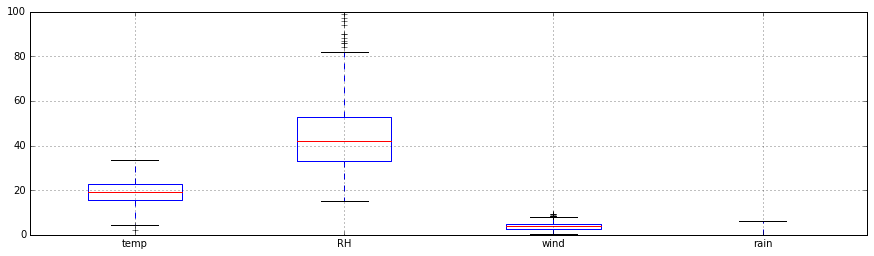

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sdf.boxplot(ax=ax)
plt.show()

### [Mission 4] 4대요인 및 area를 포함하여 dataframe을 얻어오고 area를 두 가지 부류로 나누어 각 4가지 속성을 비교 분석하기 
- area의 값의 편차가 너무 심하기 때문에 그러한 편차를 줄이기 위하여 numpy.log1p (자연로그) 사용
  - Calculates log(1 + x)
  - http://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html#numpy.log1p
- 두 가지 부류로 나누는 기준은 log(1 + area) 값이 50% percentile 이상인 것과 50% percentile 이하인 것으로 정함
  - 각각을 sdf_1과 sdf_2라고 명명
- sdf_1 및 sdf_2에 대하여 4대 주 요인 (temp, RH, wind, rain) 속성별 기본 통계치 및 Box Plot 산출
  - describe()가 제공하는 통계치 및 boxplot을 보면서 나름대로의 해석을 반드시 3가지이상 제시하시오.

In [15]:
sdf = df[['temp', 'RH', 'wind', 'rain', 'area']]
sdf

,temp,RH,wind,rain,area
0,8.2,51,6.7,0.0,0.00
1,18.0,33,0.9,0.0,0.00
2,14.6,33,1.3,0.0,0.00
3,8.3,97,4.0,0.2,0.00
4,11.4,99,1.8,0.0,0.00
5,22.2,29,5.4,0.0,0.00
6,24.1,27,3.1,0.0,0.00
7,8.0,86,2.2,0.0,0.00
8,13.1,63,5.4,0.0,0.00
9,22.8,40,4.0,0.0,0.00


In [32]:
log1p_val = np.log1p(sdf['area'])
sdf.loc[:, 'area'] = log1p_val
sdf

,temp,RH,area,fire,predicted_fire
0,8.2,51,0.000000,0,0
1,18.0,33,0.000000,0,1
2,14.6,33,0.000000,0,0
3,8.3,97,0.000000,0,0
4,11.4,99,0.000000,0,0
5,22.2,29,0.000000,0,1
6,24.1,27,0.000000,0,1
7,8.0,86,0.000000,0,0
8,13.1,63,0.000000,0,0
9,22.8,40,0.000000,0,1


In [17]:
sdf.describe()

,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000
mean,18.889168,44.288201,4.017602,0.021663,1.111026
std,5.806625,16.317469,1.791653,0.295959,1.398436
min,2.200000,15.000000,0.400000,0.000000,0.000000
25%,15.500000,33.000000,2.700000,0.000000,0.000000
50%,19.300000,42.000000,4.000000,0.000000,0.418710
75%,22.800000,53.000000,4.900000,0.000000,2.024193
max,33.300000,100.000000,9.400000,6.400000,6.995620


In [18]:
sdf_1 = sdf[sdf['area'] >= 0.41871]
sdf_2 = sdf[sdf['area'] < 0.41871]

In [19]:
sdf_1.describe()

,temp,RH,wind,rain,area
count,260.000000,260.000000,260.000000,260.000000,260.000000
mean,19.256923,43.696154,4.133462,0.030000,2.198902
std,6.269451,15.275462,1.899338,0.405969,1.226033
min,2.200000,15.000000,0.400000,0.000000,0.418710
25%,15.900000,32.750000,2.700000,0.000000,1.228844
50%,20.100000,41.000000,4.000000,0.000000,2.022208
75%,23.400000,53.000000,4.900000,0.000000,2.838020
max,33.300000,96.000000,9.400000,6.400000,6.995620


In [20]:
sdf_2.describe()

,temp,RH,wind,rain,area
count,257.000000,257.00000,257.000000,257.000000,257.000000
mean,18.517121,44.88716,3.900389,0.013230,0.010450
std,5.283718,17.31732,1.671229,0.098326,0.055369
min,4.200000,15.00000,0.900000,0.000000,0.000000
25%,15.400000,33.00000,2.700000,0.000000,0.000000
50%,18.700000,42.00000,3.600000,0.000000,0.000000
75%,21.700000,54.00000,5.400000,0.000000,0.000000
max,32.400000,100.00000,8.500000,1.000000,0.385262


/Users/yhhan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


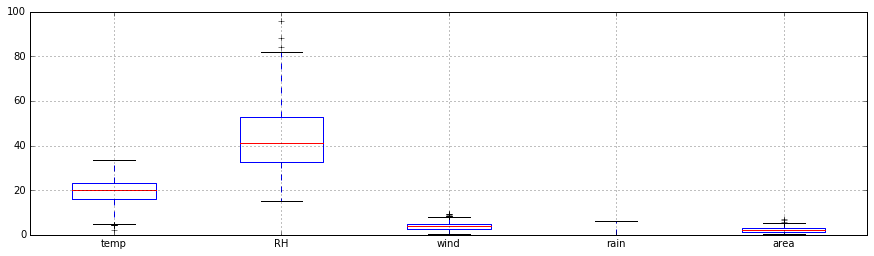

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sdf_1.boxplot(ax=ax)
plt.show()

/Users/yhhan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  app.launch_new_instance()


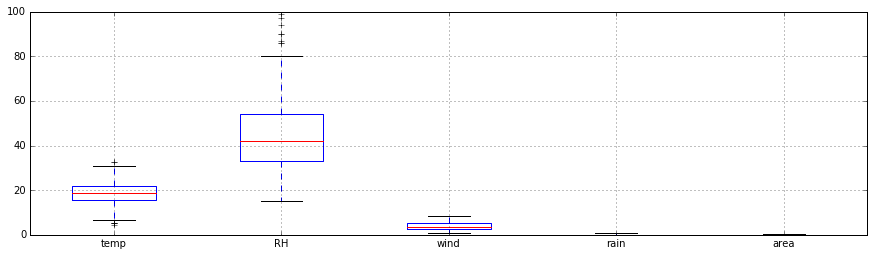

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)
sdf_2.boxplot(ax=ax)
plt.show()

### [Mission 5] 단일변수 선형 회귀분석을 통하여 가장 영향이 높은 속성 선발
- 다음 요인들 중 area와 가장 연관성이 높은 주요 요인을 선정
  - FFMC
  - DMC
  - DC
  - ISI
  - temp
  - RH
  - wind
  - rain

In [39]:
sdf = df[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']]
log1p_val = np.log1p(sdf['area'])
sdf.loc[:, 'area'] = log1p_val
sdf.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [38]:
predicator_names = ('FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain')
predicator_analysis = {}
for i in range(0, 7):
    predicator_analysis[predicator_names[i]] = np.corrcoef(sdf[predicator_names[i]], sdf['area'])[0][1]
print predicator_analysis    

{'DMC': 0.067152739815040802, 'temp': 0.053486548992797062, 'DC': 0.066359755967180495, 'ISI': -0.01034687868230952, 'FFMC': 0.046798563676477382, 'RH': -0.053662158282934122, 'wind': 0.066973489251589718}


### [Mission 6] 가장 영향이 높은 요인 두 개로 다변수 선형 회귀분석 수행

In [25]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
X = zip(sdf['temp'], sdf['RH'])
Y = sdf['area'].values
regr = regr.fit(X, Y)

print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

Coefficients: [ 0.8810733  -0.12925007]
Intercept: 1.92880310331


- 선형 회귀식
  - $y = 1.928 + 0.881 * temp - 0.129 * RH$

In [26]:
predicted_area = []
for i in range(0, len(sdf)):
    predicted_area.append(regr.predict(X[i]))

sdf.loc[:, 'predicted_area'] = predicted_area
sdf

/Users/yhhan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/yhhan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/yhhan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,predicted_area
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,2.561851
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,13.522870
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,10.527221
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,-3.295545
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,-0.822718
5,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00,17.740379
6,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00,19.672918
7,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00,-2.138116
8,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00,5.328109
9,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00,16.847272


### [Mission 7] 가장 영향이 높은 요인 두 개로 다변수 로지스틱 회귀분석 수행
- area의 값의 편차가 너무 심하기 때문에 그러한 편차를 줄이기 위하여 numpy.log1p (자연로그) 사용
  - Calculates log(1 + x)
  - http://docs.scipy.org/doc/numpy/reference/generated/numpy.log1p.html#numpy.log1p
- 새로운 Categorical Variable로서 0 및 1을 지니는 'fire' 컬럼 생성
- 두 가지 부류로 나누는 기준은 log(1 + area) 값이 50% percentile 이상인 것과 50% percentile 이하인 것으로 정함
  - log(1 + area) 값이 50% percentile 이상이면 'fire' 컬럼 값이 1
  - log(1 + area) 값이 50% percentile 이하이면 'fire' 컬럼 값이 0
- 로지스틱 회귀분석에 의한 분류의 정확도를 최종적으로 출력하시오.  

In [27]:
sdf = df[['temp', 'RH', 'area']]
sdf.loc[:, 'area'] = np.log1p(sdf['area'])
fire = []
for i in range(0, len(sdf)):
    if sdf.iloc[i]['area'] >= 0.41871:
        fire.append(1)
    else:
        fire.append(0)

sdf.loc[:, 'fire'] = fire
sdf

,temp,RH,area,fire
0,8.2,51,0.000000,0
1,18.0,33,0.000000,0
2,14.6,33,0.000000,0
3,8.3,97,0.000000,0
4,11.4,99,0.000000,0
5,22.2,29,0.000000,0
6,24.1,27,0.000000,0
7,8.0,86,0.000000,0
8,13.1,63,0.000000,0
9,22.8,40,0.000000,0


In [28]:
X = zip(sdf['temp'], sdf['RH'])
Y = sdf['fire'].values
regr2 = linear_model.LogisticRegression()
regr2.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
print 'Coefficients:', regr2.coef_
print 'Intercept:', regr2.intercept_

Coefficients: [[ 0.01885868 -0.00132539]]
Intercept: [-0.2837215]


In [30]:
predicted_fire = []
for i in range(0, len(sdf)):
    predicted_fire.append(regr2.predict(X[i]))

sdf.loc[:, 'predicted_fire'] = predicted_fire
sdf

/Users/yhhan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/yhhan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/Users/yhhan/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

,temp,RH,area,fire,predicted_fire
0,8.2,51,0.000000,0,0
1,18.0,33,0.000000,0,1
2,14.6,33,0.000000,0,0
3,8.3,97,0.000000,0,0
4,11.4,99,0.000000,0,0
5,22.2,29,0.000000,0,1
6,24.1,27,0.000000,0,1
7,8.0,86,0.000000,0,0
8,13.1,63,0.000000,0,0
9,22.8,40,0.000000,0,1


In [31]:
correctly_predicted = 0
for i in range(0, len(sdf)):
    if predicted_fire[i] == Y[i]:
        correctly_predicted += 1
        
print float(correctly_predicted) / len(sdf)

0.541586073501
